##Context:
Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.
 
##Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 
Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone

In [ ]:
!pip install contractions

     |████████████████████████████████| 286kB 27.3MB/s 
     |████████████████████████████████| 327kB 49.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85390 sha256=0421c79c50d719e86a1bb4581b3df49737a731676605d25f1f4e07b056114734
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
# Importing required libraries.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Importing data from Tweets Csv file
smidata = pd.read_csv('/content/sample_data/Tweets.csv')

In [ ]:
# Printing shape of the data
smidata.shape    

(14640, 15)

In [ ]:
smidata.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
smidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

*  Dataset has 15 columns with 14640 records.
*  tweet_id, airline_sentiment, arilinesentiment_confidence, retweet_count and text column values are populated for all the records.
*  Our focus is on text and airline sentiment to perform the sentiment analysis and remaining columns will be dopped by creating a new pandas dataframe.
* text and tweet column values are populated for all the records.






In [ ]:
# New data from smdata by removing other irrelevent fields to build the model.
smdata = smidata.loc[:,['airline_sentiment','text']]

In [ ]:
smdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
# Printing shape of the data  
smdata.shape   

(14640, 2)

In [ ]:
pd.set_option("display.max_colwidth", None)
smdata.head() # Printing first 5 rows   

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


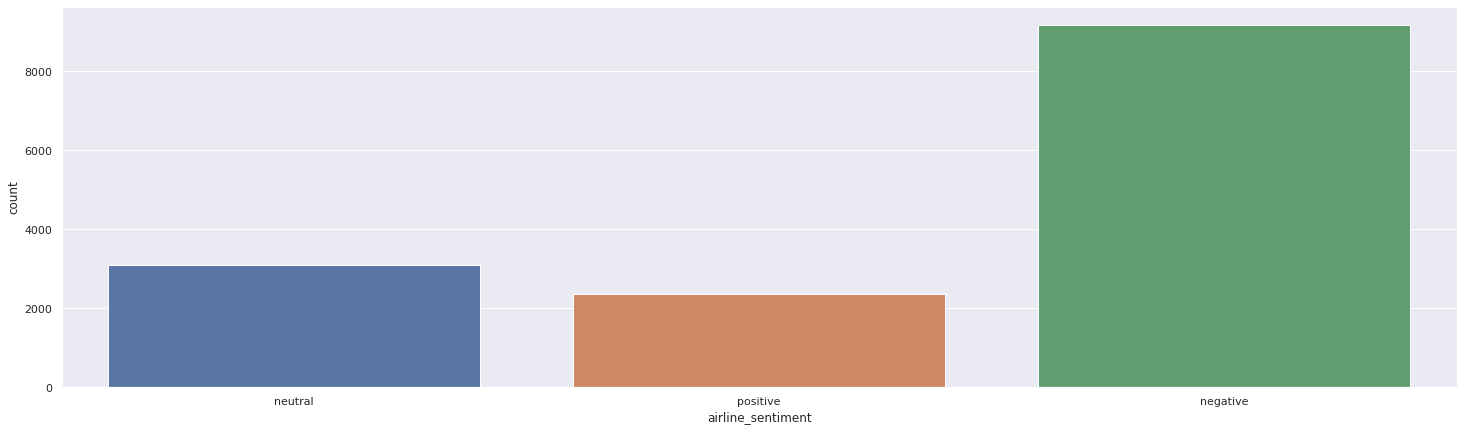

In [ ]:
 # Checking Unique values for airline_sentiment
 sns.set(rc={'figure.figsize':(25,7)})
 ax=sns.countplot(x='airline_sentiment', data=smdata)

 Data file has three types of sentiments nuetral, positive and negative and 9000+ records are classified under negative review.

## Text Pre-processing

In [ ]:
# HTML Tag removals from the text field
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

smdata['text'] = smdata['text'].apply(lambda x: strip_html(x))
smdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [ ]:
#Remove http urls from the text.
def remove_http(text):
    new_text = re.sub(r"http\S+", "", text)
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: remove_http(x))
smdata.tail()

,airline_sentiment,text
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?


In [ ]:
# Replace contractions in string of text
smdata['text']  = smdata.apply(lambda row: contractions.fix(row['text']), axis=1) 
smdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [ ]:
# Remove the numbers from the text.
def remove_numbers(text):
    text = re.sub(r'\d+','', text)
    return text

smdata['text'] = smdata['text'].apply(lambda x: remove_numbers(x))
smdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [ ]:
# Tokenization of words
smdata['text'] = smdata.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
smdata.head()


,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [ ]:
# Removal of Special Characters and Punctuations
def remove_special_punctuation(text):
    new_text = []
    for word in text:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_text.append(new_word)
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: remove_special_punctuation(x))
smdata.head() 

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [ ]:
# Convert all characters to lowercase
def to_lowercase(text):
    new_text = []
    for word in text:
        new_word = word.lower()
        new_text.append(new_word)
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: to_lowercase(x))
smdata.head()     


,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"


In [ ]:
# stop words custom list.
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist))                              


In [ ]:
# Remove stop words from list of tokenized words
def remove_stopwords(text):
    new_text = []
    for word in text:
        if word not in stopwords:
            new_text.append(word)
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: remove_stopwords(x))
smdata.head()     


,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, experience, tacky]"
2,neutral,"[virginamerica, not, today, must, mean, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


In [ ]:
# removing airlines names infront of the text, 
# hence we are building the model by considering only the text and airline sentiment
airlinelist = ['virginamerica','united','southwestair','jetblue','usairways','americanair']
# Remove stop words from list of tokenized words
def remove_airlineslist(text):
    new_text = []
    for word in text:
        if word not in airlinelist:
            new_text.append(word)
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: remove_airlineslist(x))
smdata.head()    

,airline_sentiment,text
0,neutral,"[dhepburn, said]"
1,positive,"[plus, added, commercials, experience, tacky]"
2,neutral,"[not, today, must, mean, need, take, another, trip]"
3,negative,"[really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[really, big, bad, thing]"


In [ ]:
# Remove non-ASCII characters from the list.
def remove_non_ascii(text):
    new_text = []
    for word in text:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_text.append(new_word)
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: remove_non_ascii(x))
smdata.head()    


,airline_sentiment,text
0,neutral,"[dhepburn, said]"
1,positive,"[plus, added, commercials, experience, tacky]"
2,neutral,"[not, today, must, mean, need, take, another, trip]"
3,negative,"[really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,negative,"[really, big, bad, thing]"


In [ ]:
# Lemmatize the words after preprocessing
lemmatizer = WordNetLemmatizer()
def lemmatize_list(text):
    new_text = []
    for word in text:
      new_text.append(lemmatizer.lemmatize(word, pos='v'))
    return new_text
smdata['text'] = smdata['text'].apply(lambda x: lemmatize_list(x))
smdata.head()      


,airline_sentiment,text
0,neutral,"[dhepburn, say]"
1,positive,"[plus, add, commercials, experience, tacky]"
2,neutral,"[not, today, must, mean, need, take, another, trip]"
3,negative,"[really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]"
4,negative,"[really, big, bad, thing]"


In [ ]:
# joining the words in the list to convert back to text string
def join_words(text):
   return ' '.join(text)
smdata['text'] = smdata['text'].apply(lambda x: join_words(x))
smdata.head()      


,airline_sentiment,text
0,neutral,dhepburn say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


In [ ]:
# Minimum review length and Maximum review length.
print('Minimum review length: {}'.format(
len(min((smdata['text']), key=len))))
print('Maximum review length: {}'.format(
len(max((smdata['text']), key=len))))


Minimum review length: 0
Maximum review length: 121


In [ ]:
# Checking the records that has length 0, 2,3
min_rec = smdata[smdata['text'].apply(lambda x: len(x) == 3)]
print(min_rec)


      airline_sentiment text
18             positive  fly
269            positive  see
753             neutral  yes
1916            neutral  iep
1935           negative  lie
2607           negative  not
3485            neutral  fee
3558           positive  win
3611           negative  yes
4964           positive  fav
5954            neutral  yes
6295           negative  not
7051            neutral  bro
7173           positive  bet
7358           negative  day
8452            neutral  cri
9255           negative  not
9954           negative  bag
10540          negative  bag
10776          negative  get
11109          positive  lol
11286          negative  not
12209           neutral  yes
12535          negative  not
12628           neutral  way
12946          negative  bag
13225           neutral  hop


There are 17 records that doesn't have any text information for the model to process. Deleting these records should improve the performance of the model.

In [ ]:
# Checking the records that has length 2
min_rec = smdata[smdata['text'].apply(lambda x: len(x) == 2)]
print(min_rec)


      airline_sentiment text
988             neutral   do
2113           negative   dm
2985            neutral   do
4402            neutral   do
4955            neutral   do
5333            neutral   dm
5655            neutral   dm
5832            neutral   do
5903            neutral   th
6538            neutral   dm
6833           negative   dm
8558            neutral   dm
10904           neutral   do
11261          positive   do
11771           neutral   do
12294           neutral   dm
12527           neutral   do
12553          negative   dm
13213           neutral   do
14196           neutral   go
14443           neutral   hi


There are 21 records that has text length has 2, hence it is difficult to understand removing these should help the model.

In [ ]:
# dropping the records which has zero text length
smdata.drop(smdata[smdata['text'].apply(lambda x: len(x) == 0)].index, inplace=True)
smdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14623 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14623 non-null  object
 1   text               14623 non-null  object
dtypes: object(2)
memory usage: 342.7+ KB


In [ ]:
# dropping the records which has text length as 2
smdata.drop(smdata[smdata['text'].apply(lambda x: len(x) == 2)].index, inplace=True)
smdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14602 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14602 non-null  object
 1   text               14602 non-null  object
dtypes: object(2)
memory usage: 982.2+ KB


21 records are dropped from the dataset which has length of 2.

In [ ]:
# Checking the Maximum text length of the records
max_rec = smdata[smdata['text'].apply(lambda x: len(x) >= 100)]
print(max_rec)


      airline_sentiment                                                                                                                   text
48              neutral                   ladygaga carrieunderwood last night tribute soundofmusic oscars ladygaga think carrieunderwood agree
127            positive                  completely awesome experience last month boslas nonstop thank awesome flight depart time vabeatsjblue
357             neutral                   partner visa checkout mobile payment method help boost mobile conversion rat etailwest payments visa
375            positive                   flight book problems last second flight next week sfo san chance want gift promo code since love guy
550            negative  iah charlotte baggage claim rep latrice h customerservice non existent ignore customer inappropriately touch customer
...                 ...                                                                                                                    ...

### Building the model based on CountVectorizer and Random Forest

In [ ]:
# Vectorization (Convert text data to numbers).
# Keep only 1000 features as number of features will increase the processing time.
vectorizer = CountVectorizer(max_features=1000)                
data_features = vectorizer.fit_transform(smdata['text'])
 # Convert the data features to array.
data_features = data_features.toarray()  
data_features.shape                     

(14602, 1000)

In [ ]:
labels = smdata['airline_sentiment']
print(labels)

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14602, dtype: object


In [ ]:
#labels=labels.replace({'negative':1,'neutral':2, 'positive':3})
#labels = labels.astype('int')
#print(labels)
# Converting the lables to numbers didn't help the model performance.

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build the model for the classification of reviews.
# Also calculating the cross validation score.
cvrforest = RandomForestClassifier(n_estimators=200, n_jobs=4)
cvrforest = cvrforest.fit(X_train, y_train)
print(cvrforest)
print(np.mean(cross_val_score(cvrforest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7514725792992227


In [ ]:
# Hyper parameter tuning for random forest for count vectorizer. 
cvrforest_tuned = RandomForestClassifier(random_state=1)
# Random parameters to choose from
param_grid = {'n_estimators': [10,25,50,100,125,150,175,200,225,250], 
              'criterion': ['gini'], 
              'min_samples_split': [2,3,4,5,6,7],
              'min_samples_leaf': [1,2,3,4,5,6,7],
              }
              
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

random_cv = RandomizedSearchCV(estimator=cvrforest_tuned, param_distributions=param_grid, n_iter=50, scoring=acc_scorer, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train,y_train)
print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))


Best parameters are {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini'} with CV score=0.7680268692862595:


In [ ]:
# Creating Count Vectorizer random forest with best parameters
cvrforest_tuned = RandomForestClassifier(
       random_state=1,
       n_estimators    = 200,
       criterion = 'gini',
       min_samples_leaf = 1,
       min_samples_split = 6,
       n_jobs=4       )

# Fit the model on training data
cvrforest_tuned.fit(X_train, y_train)
cvrforest_tuned = cvrforest_tuned.fit(X_train, y_train)
print(cvrforest_tuned)
print(np.mean(cross_val_score(cvrforest_tuned, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7600330511096735


In [ ]:
# Predict the result for test data using the model built with count vectorizer and hyper parameter tuned random forest
result = cvrforest_tuned.predict(X_test)


In [ ]:
# Checking the occurences of the predicted lables
occurrences = np.count_nonzero(result == 'negative')
print('negative predictive occurrences',occurrences)
occurrences = np.count_nonzero(result == 'neutral')
print('nuetral predictive occurrences',occurrences)
occurrences = np.count_nonzero(result == 'positive')
print('postive predictive occurrences',occurrences)


negative predictive occurrences 3151
nuetral predictive occurrences 632
postive predictive occurrences 598


In [ ]:
# Checking the occurences of the test lables
occurrences = np.count_nonzero(y_test == 'negative')
print('negative test occurrences',occurrences)
occurrences = np.count_nonzero(y_test == 'neutral')
print('nuetral test occurrences',occurrences)
occurrences = np.count_nonzero(y_test == 'positive')
print('postive test occurrences',occurrences)

negative test occurrences 2765
nuetral test occurrences 904
postive test occurrences 712


[[2552  146   67]
 [ 418  404   82]
 [ 181   82  449]]


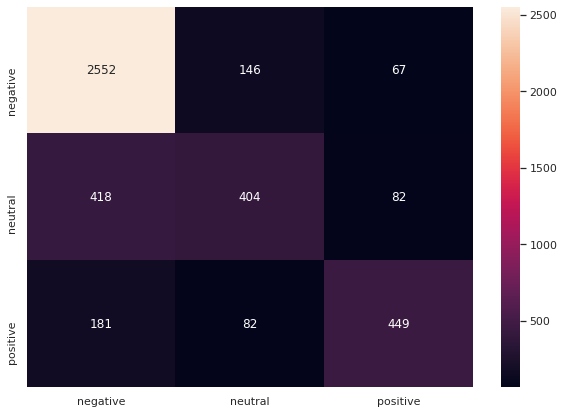

In [ ]:
# Building the confusion metrics to get better understanding about test results
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)
list_sentiment = ['negative','neutral','positive']

df_cm = pd.DataFrame(conf_mat, index = [i for i in list_sentiment],
                  columns = [i for i in list_sentiment])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Building the model based on TfidfVectorizer and Random Forest

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.
tvectorizer = TfidfVectorizer(max_features=1000)
tdata_features = tvectorizer.fit_transform(smdata['text'])
tdata_features = tdata_features.toarray()
tdata_features.shape

(14602, 1000)

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(tdata_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build the model for the classification of reviews.
# Also calculating the cross validation score.
tvrforest = RandomForestClassifier(n_estimators=200, n_jobs=4)
tvrforest = tvrforest.fit(X_train, y_train)
print(tvrforest)
print(np.mean(cross_val_score(tvrforest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7510620892051795


In [ ]:
# Hyper parameter tuning for random forest for Tfidfvectorizer. 
tvrforest_tuned = RandomForestClassifier(random_state=1)

# Random parameters to choose from
param_grid = {'n_estimators': [10,25,50,100,125,150,175,200,225,250], 
              'criterion': ['gini'], 
              'min_samples_split': [2,3,4,5,6,7],
              'min_samples_leaf': [1,2,3,4,5,6,7],
              }
              
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

random_cv = RandomizedSearchCV(estimator=tvrforest_tuned, param_distributions=param_grid, n_iter=50, scoring=acc_scorer, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train,y_train)
print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))


Best parameters are {'n_estimators': 125, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'} with CV score=0.7686133795501892:


In [ ]:
# Creating Tfidf Vectorizer random forest with best parameters
tvrforest_tuned = RandomForestClassifier(
       random_state=1,
       n_estimators    = 125,
       criterion = 'gini',
       min_samples_leaf = 1,
       min_samples_split = 2,
       n_jobs=4 )

# Fit the model on training data
tvrforest_tuned.fit(X_train, y_train)
tvrforest_tuned = tvrforest_tuned.fit(X_train, y_train)
print(tvrforest_tuned)
print(np.mean(cross_val_score(tvrforest_tuned, tdata_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=4,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7584576617629134


In [ ]:
# Predict the result for test data using the model built with count vectorizer and hyper parameter tuned random forest
tresult = tvrforest_tuned.predict(X_test)

[[2576  132   57]
 [ 397  420   87]
 [ 203   93  416]]


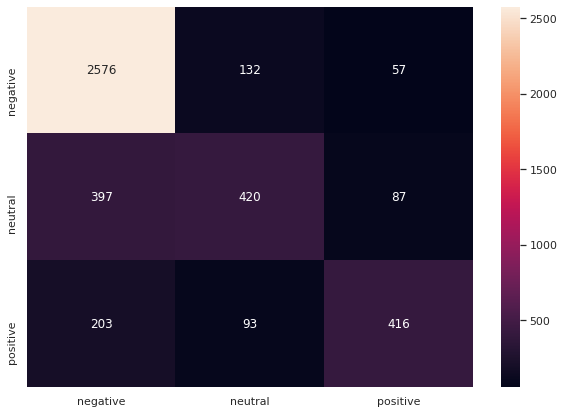

In [ ]:
# Building confusion metrics for to get better understanding about test results
conf_mat = confusion_matrix(y_test, tresult)

print(conf_mat)
list_sentiment = ['negative','neutral','positive']

df_cm = pd.DataFrame(conf_mat, index = [i for i in list_sentiment],
                  columns = [i for i in list_sentiment])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Project Summary
* Dropped all the columns from the dataset except text and airline_sentiment fields.
* Airine sentiment has 3 types of categories which are negative, nuetral and positive. 
* There are more than 9000+ negative sentiment review data points.
* The goal was to build a model for text-classification.
* During preprocessing applied below techniques to improve the performance.
  * Removed the html tags,
  * Apply the contractions for the model to understand better.
  * Remove numbers if there are any.
  * Tokenization of words.
  * Removed Special Characters and Punctuations.
  * Convert the text to lower case.
  * Removed the stop words by retaining the custom list which are required for the model to perform good for negative reviews.
  * Removed the Airlines names from the text field, hence these are not usefull for the model.
  * Removed the ASCII Characters, if there are any in the text.
  * Apply the Lemmatizer to convert the words to more meaningfull words.
  * As a last step joined all the words to form the string for the text field.
* After preprocessing there are 17 records with zero char length and 21 records with 2 char length for the text filed.
* Removed the datapoints that has text of length zero and 2 to get better performance of the model.
* Split the data into train and test with 30% split.
* Count Vectorizer process
   * Used the count Vectorizer to convert the text to array.
   * Built the model by using random forest classifier with default parameters.
   * Model has given overall accuracy of 75%.
   * By using Random serach performed the hyper parameter tuning to get the better parameters for the model to fit.
   * Fit the fine tuned model and had given overall accuracy of 76%
   * Built the confusion metric on test data to check further about the model performance.
      * Tuned Random forest model predicted 2552 reviews as negative correctly and predicted 146 as neutral and 67 as positive which suppose to predict them as Negative reviews.
      * Predicted 404 as neutral correctly and predicted 418 as negative and 82 as positive , which suppose to predict them as neutral reviews.    
      * Predicted 449 as positive correctly and 181 as negative and 82 as neutral which suppose to be predicted as positive reviews.
* TF-IDF Vectorizer process
   * Used the TF-IDF Vectorizer to convert the text to array.
   * Built the model by using random forest classifier with default parameters.
   * Model has given overall accuracy of 74.9%.
   * By using Random serach performed the hyper parameter tuning to get the better parameters for the model to fit.
   * Fit the fine tuned model and had given overall accuracy of 75.8%
   * Build the confusion metrics on test data to check further about the model performance.
      * Tuned Random forest model predicted 2576 reviews as negative correctly and predicted 132 as neutral and 57 as positive which suppose to predict them as Negative reviews.
      * Predicted 420 as neutral correctly and predicted 397 as negative and 87 as positive , which suppose to predict them as neutral reviews.    
      * Predicted 416 as positive correctly and 203 as negative and 93 as neutral which suppose to be predicted as positive reviews.
* Count vectorizer process model performed little better than the TF-IDF vectorizer on model accuracy score.
* Overall model performed well on Negative and postive reviews than compared to nuetral reviews.
* However, we can still increase the accuracy of our model by performing these
  *  Improve the model to perform better on Neutral reviews.
  *  Apply different sequentials models like RNN to check further about improving the overall performance of the model.

